# Zufallszahlen, Zufallsexperimente und Wahrscheinlichkeiten

### (Pseudo-)Zufallszahlen generieren / zufälliges Ziehen aus vorgegebener Menge

In [ ]:
import matplotlib.pyplot as plt
import math
import random

In [ ]:
# Generieren einer Zufallsvariablen (gleichverteilt zwischen 0 und 1)

print (random.random())
print (random.random())

In [ ]:
# Reproduzierbarkeit sicherstellen
random.seed(10)
print (random.random())
random.seed(10)
print (random.random())

In [ ]:
# Mehrfache Ziehung
four_uniform_randoms = [random.random() for _ in range(4)]
print (four_uniform_randoms)

In [ ]:
# Zufallsauswahl aus einem vorgegebenen Wertebereich - hier range(10)= [0, 1, ..., 9]
random.randrange(10)

In [ ]:
# Zufallsauswahl aus vorgegebener Ergebnismenge
random.choice(['win', 'lose', 'draw'])

In [ ]:
# Mehrfaches Ziehen "mit Zurücklegen" aus vorgegebener Ergebnismenge
random.choices(['win', 'lose', 'draw'], k=10)

In [ ]:
# Mehrfaches Ziehen "mit Zurücklegen" aus vorgegebener Ergebnismenge mit Gewichtung
random.choices(['win', 'lose', 'draw'], [0.3,0.5,0.2], k=10)

In [ ]:
# Mehrfaches Ziehen "ohne Zurücklegen" aus einer vorgegebenen Ergebnismenge
random.sample([10, 20, 30, 40, 50], k=4)

### Beispielhafte Simulationen mittels "random": Lottozahlen, Roulette-Ergebnisse

1. Simulieren Sie das einmalige Ziehen von Lottozahlen "6 aus 59".

2. Simulieren Sie das einmalige Ziehen aus einer Urne mit 20 schwarzen und 50 weißen Kugeln.

3. Simulieren Sie das 10-malige Ziehen (mit Zurücklegen) aus einer Urne mit 2 schwarzen und 5 weißen Kugeln.

4. Simulieren Sie das 5-malige Ziehen (jetzt ohne Zurücklegen) aus einer Urne mit 2 schwarzen und 5 weißen Kugeln.

5. Simulieren Sie das 6-malige Drehen an einem Rouletterad mit 37 Feldern (18 x "red", 18 x "black", 1 x "green").

6. Simulieren Sie das einmalige zufällige Ziehen aus einer Menge der Werte von 1-100.

7. Simulieren Sie das Ziehen von 10 Zahlen (mit Zurücklegen) aus einer Menge der Werte von 1-100.
Stellen Sie sicher, dass Sie bei erneutem Ziehen dieselben Werte erhalten.

### Simulation eines Zufallsexperimements

In [ ]:
# Simulation Zufallsexperiment: Münzwurf mit den zufälligen Ergebnissen Kopf(0) und zahl(1)   

wurf = [random.randrange(2) for x in range(10)]
print (wurf)

In [ ]:
# Berechnung der absoluten Häufigkeit für das "Ergebnis = Zahl" für verschiedene Anzahlen Münzwürfe

for i, element in enumerate(wurf):
    print (i, sum(wurf[:i+1]))

In [ ]:
# Berechnung der relativen Häufigkeit "Ergebnis = Zahl" für verschiedene Anzahlen Münzwürfe

for i, element in enumerate(wurf):
    print (i, sum(wurf[:i+1])/(i+1))

In [ ]:
# Abbildung des Verlaufs

# Erste 10 Würfe
anzahl = [range(10)]
wurf = [random.randrange(2) for x in range(10)]
anteil = []
for i, element in enumerate(wurf):
    anteil.append(sum(wurf[:i+1])/(i+1))

plt.scatter(anzahl,anteil)
plt.show()

In [ ]:
# Abbildung des Verlaufs
# Erste 500 Würfe

anzahl = [range(500)]
wurf = [random.randrange(2) for x in range(500)]
anteil = []
for i, element in enumerate(wurf):
    anteil.append(sum(wurf[:i+1])/(i+1))

plt.scatter(anzahl,anteil)
plt.show()

#### Empirisches Gesetz der großen Zahlen: Für 𝑛 → ∞ „stabilisiert“ sich ℎn(𝐴) auf einen Wert ℎ(𝐴), die sog. empirische Wahrscheinlichkeit.

## Wahrscheinlichkeitsfunktionen

### Kumulative Wahrscheinlichkeitsfunktion für die stetige Gleichverteilung (alle Zahlen zwischen 0 und 1 haben das gleiche Gewicht)

In [ ]:
def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1
    
xs = [x / 100.0 for x in range(-100, 200)]
plt.plot(xs, [uniform_cdf(x) for x in xs])
plt.show()

#### Lesebeispiele:   
Die Wahrscheinlichkeit, dass eine Zufallsvariable mit dieser Verteilung einen Wert < 0 hat, beträgt 0%.   
Die Wahrscheinlichkeit, dass sie einen Wert bis 0.4 aufweist (also 0.4 oder kleiner), beträgt 40%.   
Die Wahrscheinlichkeit, dass sie einen Wert bis 2.0 aufweist (also 2.0 oder kleiner, beträgt 100%.

## Normalverteilung

Verteilungsfunktion der Normalverteilung in Abhängigkeit von dem Mittelwert mu und der Standardabweichung sigma
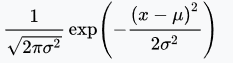

In [ ]:
# Abbildung einer Normalverteilung mit dem Mittelwert mu und der Standardabweichung sigma

def normal_pdf(x, mu=0, sigma =1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)** 2 / 2 / sigma **2) / (sqrt_two_pi * sigma))

# Plotten mehrerer Normalverteilungen mit unterschiedlichem mu bzw. sigma

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label = 'mu=0, sigma =1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label = 'mu=0, sigma =2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label = 'mu=0, sigma =0.5')
plt.plot(xs, [normal_pdf(x,mu = -1) for x in xs], '-.', label = 'mu=-1, sigma =1')
plt.legend()
plt.title("Verschiedene Normalverteilungen")
plt.show()

"Standardnormalverteilung": mu = 0, sigma = 1 (blaue Linie der Abbildung)

In [ ]:
# Abbildung einer kumulativen Normalverteilung mit dem Mittelwert mu und der Standardabweichung sigma

def normal_cdf(x, mu=0, sigma =1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

# Plotten mehrerer Normalverteilungen mit unterschiedlichem mu bzw. sigma

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-', label = 'mu=0, sigma =1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '--', label = 'mu=0, sigma =2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs], ':', label = 'mu=0, sigma =0.5')
plt.plot(xs, [normal_cdf(x,mu = -1) for x in xs], '-.', label = 'mu=-1, sigma =1')
plt.legend(loc = 4)
plt.title("Verschiedene kumulative Normalverteilungen")
plt.show()

## Zentraler Grenzwertsatz   

Eine Zufallsvariable, die dem Durchschnitt einer großen Anzahl unabhängiger und identisch verteilter Zufallsvariablen entspricht, ist selbst normalverteilt.   
Veranschaulichung mittels "binomialverteilter" Zufallsvariablen --> Ereignisse 0 und 1, 1 hat Wahrscheinlichkeit p, n-malige Durchführung und Ermittlung der Anzahl des Ergebnisses 1.   
Mittelwert einer Bernoulli(p)-Variable = 1, Standardabweichung = Wurzel (p(1-p)).   
Zentraler Grenzwertsatz: binomialverteilte Variable entspricht für ein großes n annähernd einer normalverteilten Zufallsvariable mit dem Mittelwert mu = np und der Standardabweichung sigma = Wurzel (np(1-p)).

In [ ]:
# Definition einer Bernoulli-Variablen
def bernoulli_trial(p):
        return 1 if random.random() < p else 0
def binomial(n,p):
        return sum(bernoulli_trial(p) for _ in range(n))

In [ ]:
binomial(1,0.5)

In [ ]:
binomial(10,0.5)

In [ ]:
binomial(100,0.5)

In [ ]:
binomial(1000,0.5)

In [ ]:
# Abbildung der Binomialverteilung
# Parameter p = Wahrscheinlichkeit für Auftreten 1, n = Anzahl Ziehungen bei 1-maliger Durchführung des Experiments
# (festgehaltens Ergebnis = Anzahl 1-er je Durchführungen), num_points = Anzahl Durchführungen
from collections import Counter
def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], [v / num_points for v in histogram.values()])
    plt.show()

# Darstellung: 10-malige Wiederholung des Ziehens von 100 Kugeln bei einer Trefferwahrscheinlichkeit von 75%
make_hist(0.75, 100, 10)

In [ ]:
# Darstellung 100-malige Wiederholung, des Ziehens von 100 Kugeln bei einer Trefferwahrscheinlichkeit von 75%
make_hist(0.75, 100, 100)

In [ ]:
# Darstellung 1000-malige Wiederholung, des Ziehens von 100 Kugeln bei einer Trefferwahrscheinlichkeit von 75%
make_hist(0.75, 100, 1000)

In [ ]:
make_hist(0.75, 100, 10000)

In [ ]:
# Abbilden der genäherten Normalverteilung mit Mittelwert mu und Std_abw sigma als Linie

def make_hist_normal(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], [v / num_points for v in histogram.values()])
    
    # Zeige genäherte Normalverteilung als Linie
    mu = p*n
    sigma = math.sqrt(n * p * (1-p))
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomialverteilung vs. Normalverteilung")
    plt.show()

make_hist_normal(0.75, 100, 100)

In [ ]:
make_hist_normal(0.75, 100, 10000)

In [ ]:
# Bestimmung der Wahrscheinlichkeit, mit der eine "faire" Münze in 100 Würfen mehr als 60 mal Kopf zeigt

# Münzwurf: binomialverteilt mit p(Kopf) = 0.5

# Zentraler Grenzwertsatz: binomialverteilte Variable entspricht für ein großes n annähernd einer normalverteilten
# Zufallsvariable mit Mittelwert mu = np (hier: 100*0.5) und Standardabw. sigma = Wurzel(np(1-p)) (hier: Wurzel(50*0.5).
# --> Ermittlung der Wahrscheinlichkeit, mit der eine Normalverteilung N(50,5) größer als 60 ist.

# Plotten der kumulativen Normalverteilungen N(50,5)

xs = [x / 10.0 for x in range(-10, 1000)]
plt.plot(xs, [normal_cdf(x, mu=50, sigma=5) for x in xs], '-', label = 'mu=50, sigma =5')
plt.show()

In [ ]:
normal_cdf(60, mu=50, sigma=5)

Die Wahrscheinlichkeit, dass die Münze in 100 Würfen höchstens 60 mal Kopf zeigt, liegt bei ca. 97,7%.
Die Wahrscheinlichkeit, dass die Münze in 100 Würfen mehr als 60 mal Kopf zeigt, liegt bei ca. 2,3%.

#### Ermitteln Sie über den zentralen Grenzwertsatz (mittels Normalverteilung) die Wahrscheinlichkeit, mit der ein Würfel bei 60 Würfen   
a) mindestens 20 mal die 1 zeigt,  
b) höchstens 10 mal die 1 zeigt.